# 
# Natural Language Processing + Predictive Text-Generation:
## ("*in the style of*")

* ### Problem Definition: Our goal is to *look at transcripts* of various comedians, and note their *'similarities' and 'differences'*.
# 
## 1) Loading The Data.

[  all our files are in *'.txt'* format (in binary/byte format), ]
# 
* We'll start by **creating** a dictionary,

In [ ]:
import pickle


data = {}

            # key : value -> (comedian name) , value : (transcript) #


    # Create a variable, #
    
comedians = ["louis" , "dave" , "ricky" , "bo" , "bill" , "jim" , 
             "john" , "hasan" , "ali" , "anthony" , "mike" , "joe"]


# Itterate (index), #
for i, c in enumerate(comedians) :                         # 'i' = index # , 'c' = comedian #
    
    # Load transcripts, #
    with open("transcripts/" + c + ".txt" , "rb") as file:         # 'rb' = read binary/byte mode #
        
        # Store in dictionary, #
        data[c] = pickle.load(file)

* We **call-in** some keys for our data dictionary,

In [2]:
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

* **Check** the transcript from a particular comedian,

In [ ]:
data['ricky'][ : 2]           # '[:2]' = first 2 paragraphs/transcripts , 'without []' = all text #

# 
## 2) Data Cleaning.
[ **remove** *'jargon'* from the transcripts ]
# 
* We will go through an essential step of any Data Science Project - **Data Cleaning**. *Data Cleaning* is a time consuming and unenjoyable task, yet it's a very important one. 

Keep in mind, ***"garbage in, garbage out"***. Feeding *dirty data* into a model will give us results that are *meaningless*.
# 
Specifically, we'll be walking through:

1. **Getting Data - ** in this case, we'll be scraping data from a website
2. **Cleaning Data - ** we will walk through popular text pre-processing techniques
3. **Organizing data - ** we will organize the cleaned data into a way that is easy to input into other algorithms

The **output** of this notebook will be clean, organized data in two standard text formats:

1. ***'Corpus'*** - a *collection* of text (our transcript itself)
2. ***'Document-Term Matrix'*** - *word counts* in matrix format (unique word amounts in transcript)

* **Combine** data,

In [7]:
def combine_text(list_of_text) : 
    combine_text = ' '.join(list_of_text)
    
    return combine_text

* **Combine** *dictionary* (with 'key' as comedian and 'value' as transcript),

In [10]:
#dict with key as comedian name and value is their transcript

data_combine = {key : [combine_text(value)] for (key , value) in data.items()}         # 'data.items()' = dict into tupple #

* **Convert** *'dict'* to ***Pandas*** dataframe, 

In [12]:
import pandas as pd


data_df = pd.DataFrame.from_dict(data_combine).transpose()

In [ ]:
print(data_df)

* **Give** column names (and sort them in alphabetical order),

In [15]:
data_df.columns = ["transcript"]

data_df = data_df.sort_index()


data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the st..."
anthony,"Thank you. Thank you. Thank you, San Francisco..."
bill,"[cheers and applause] All right, thank you! Th..."
bo,Bo What? Old MacDonald had a farm E I E I O An...
dave,This is Dave. He tells dirty jokes for a livin...
hasan,[theme music: orchestral hip-hop] [crowd roars...
jim,[Car horn honks] [Audience cheering] [Announce...
joe,[rock music playing] [audience cheering] [anno...
john,"All right, Petunia. Wish me luck out there. Yo..."
louis,Intro\nFade the music out. Let’s roll. Hold th...


In [18]:
data_df.transcript.loc["ricky"]

'Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonight. You’re thinking, “Relax, we’ve had our money’s worth just seeing you.” What? You’re a legend. Shut up! What is he? I’m not a god. I’m just an ordinary guy, you know, going round talking to people sort… sort of like Jesus… in a way… but better. Well, I’ve actually turned up. So… Thank you and welcome to my new show, Humanity. I don’t know why I called it that. I’m not a big fan. I prefer dogs… obviously. Dogs are better people than people, aren’t they? They’re amazing, dogs. They’re our best friends. They guard us, they guide us. There’s medical detection dogs that can smell if you’ve got… AIDS. I’m not a doctor… but their noses are a thousand times more sensitive than ours, so they go, “Cor, you’re well HIV! Fuck!” You know? And you go, “You can smell AIDS on someone?” Yeah. “Why didn’t you smell it on the bloke I brought home last night,

This type of data is called **unstructured data** (since it's not in rows and columns).
# 
## 3) Cleaning Data.

When dealing with numerical data, data cleaning often involves **removing null values** and **duplicate** data, dealing with **outliers**, etc. With text data, there are some common data cleaning techniques, which are also known as *text pre-processing* techniques.
# 
With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the **MVP (minimum viable product)** approach - *start simple and iterate*. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

Common data cleaning steps on all text:

    Make text all 'lower-case'
    Remove 'punctuation'
    Remove 'numerical' values
    Remove common non-sensical text ('/n')
    'Tokenize' text
    Remove 'stop words'

More data cleaning steps after tokenization (to make our Model more accurate with cleaner data):

    Stemming / lemmatization
    Parts of speech tagging
    Create bi-grams or tri-grams
    Deal with typos
    And more...



In [17]:
import re                      # re = regular expression, to define 'patterns', and replace them #

import string

* **Define** function to clean your text,

In [19]:
def clean_text(text) : 
    
    text = text.lower()                           # lower-case #
    
    text = re.sub('\[.*?\]' , '' , text)          # sub = substitute ; '[.*?]' = any number of characters ; '''' = replace/remove with 'nothing' #
    
    text = re.sub('[%s]' % re.escape(string.punctuation) , '' , text)  # this line of code will try to find punctuations and remove them #
    
    text = re.sub('\w*\d\w*' , '' , text)         # Numbers made words: '\w' = word , '*' = any number of words , '\d' = digits #
    
    return text

In [20]:
round1 = lambda x : clean_text(x)   # 1st round of cleaning , we can make several rounds if desired #

* **Look** at updated text,

In [24]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))

data_clean.transcript.loc["ali"]


'ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with ’cause i have to pee in like ten minutes but thank you everybody so much for coming um… it’s a very exciting day for me it’s been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that i’m getting older because now when i see an  girl my automatic thought… is “fuck you” “fuck you i don’t even know you but fuck you” ‘cause i’m straight up jealous i’m jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through\nand then when they go to sleep they just go to sleep right they don’t have insomnia yet they don’t know what it’s lik

# 
* **Round 2**, [ *[pattern]* , *"replacement"* ]

In [31]:
def clean_text_round2(text) :
    
    text = re.sub('[''""...]' , "" , text)            # we'll remove all these punctuations 
    
    text = re.sub("\n" , "" , text)                   # and non-sense text #
    
    text = re.sub("\xa0" , "" , text)
    
    return text


round2 = lambda x : clean_text_round2(x)
    

In [39]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))

data_clean

,transcript
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...
hasan,what’s up davis what’s up i’m home i had to ...
jim,ladies and gentlemen please welcome to the ...
joe,ladies and gentlemen welcome joe rogan wha...
john,all right petunia wish me luck out there you w...
louis,introfade the music out let’s roll hold there ...


***Advanced Cleaning Steps:*** Stemming / lemmatization, Parts of speech tagging, Create bi-grams or tri-grams, Deal with typos, etc.
# 
Now, a very important step in NLP cleaning is ***removing stop words*** (words that don't give essential information, shouldn't be fed to our ML).

In this project we'll be using something called:
## 4) Document-Term Matrix.
[ **'How to organize your now clean data.'** ]
# 

* **Feature extraction** with ***scikit-learn*** library,

In [33]:
from sklearn.feature_extraction import text

from sklearn.feature_extraction.text import CountVectorizer

* **Create** object of CountVectorizer (and **transform** it),

In [34]:
cv = CountVectorizer(stop_words = "english")

data_cv = cv.fit_transform(data_clean.transcript)


* **Convert** our *'data_cv'* into ***matrix*** (and create a *variable*), 

In [37]:
data_dtm = pd.DataFrame(data_cv.toarray() , columns = cv.get_feature_names())       # 'dtm' = document-term matrix #

* **Add** comedian names to table,

In [40]:
data_dtm.index = data_clean.index

In [ ]:
# data_cv.transcript["ali"]               # if we check this column again, we'll get an error since it can't find it anymore #

In [41]:
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


# 
## 5) Exploratory Data Analysis.

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with ***numerical data***, some of the exploratory data analysis (**EDA**) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with ***text data***. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (**ML**) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms
# 
### a) Most Common Words,
* Let's start by finding the **top 30 words** spoken by each comedian, [ by *transposing* our data and then making it into a {*dictionary*} ]

In [47]:
data = data_dtm.transpose()           # 'row' will become column ; 'column' will become row #


top_dict = {}

for c in data.columns :
    
    top = data[c].sort_values(ascending = False).head(30)
    
    top_dict[c] = list(zip(top.index, top.values))
    
    
print(top_dict)
    
    

{'ali': [('like', 126), ('know', 65), ('just', 64), ('don', 61), ('shit', 34), ('gonna', 28), ('ok', 26), ('lot', 24), ('gotta', 21), ('wanna', 21), ('oh', 21), ('husband', 20), ('right', 19), ('time', 19), ('got', 19), ('women', 19), ('cause', 18), ('day', 17), ('people', 16), ('pregnant', 15), ('need', 14), ('god', 14), ('yeah', 13), ('tell', 13), ('really', 12), ('dude', 12), ('work', 12), ('white', 11), ('baby', 11), ('asian', 11)], 'anthony': [('like', 50), ('know', 39), ('don', 38), ('joke', 35), ('got', 34), ('said', 31), ('ve', 28), ('anthony', 27), ('just', 26), ('say', 26), ('day', 26), ('people', 23), ('guys', 22), ('grandma', 19), ('tell', 19), ('right', 18), ('thing', 18), ('think', 17), ('time', 17), ('did', 16), ('baby', 16), ('good', 16), ('dad', 16), ('yeah', 16), ('school', 16), ('jokes', 15), ('gonna', 15), ('okay', 15), ('didn', 14), ('mad', 14)], 'bill': [('like', 200), ('just', 149), ('right', 131), ('know', 99), ('don', 95), ('gonna', 77), ('got', 72), ('fucking'

* **Refine** your dictionary (we'll print the **top 15 words** /comedian), [ *for better viewing* ]

In [48]:
for comedian , top_words in top_dict.items()     # We're converting 'dict' into 'tupples' #
    
    print(comedian)
    
    print(" , ".join([word for word , count in top_words[0 : 14]]))    # To loop around top words, and extract the word with our given separation#
    
    print("-----------------------")                                   # To separate between comedians #

ali
like , know , just , don , shit , gonna , ok , lot , gotta , wanna , oh , husband , right , time
-------------------
anthony
like , know , don , joke , got , said , ve , anthony , just , say , day , people , guys , grandma
-------------------
bill
like , just , right , know , don , gonna , got , fucking , yeah , shit , dude , think , want , ll
-------------------
bo
know , like , love , bo , think , just , stuff , repeat , don , yeah , want , right , ve , cos
-------------------
dave
like , know , said , just , shit , people , didn , don , ahah , time , fuck , fucking , black , man
-------------------
hasan
like , know , don , dad , just , going , want , got , love , ve , hasan , right , say , time
-------------------
jim
like , don , right , fucking , just , know , went , ve , people , day , oh , think , going , fuck
-------------------
joe
like , people , just , don , fucking , fuck , gonna , know , think , shit , got , man , right , house
-------------------
john
like , know , j

Now we can easily make our analysis with this distribution of data.
 
# 
### b) Creating a Word Cloud,
* Let's first **remove** stop words further,

In [49]:
from collections import Counter


words = []


for comedian in data.columns:
    
    top = [word for word , count in top_dict[comedian]]
    
    for t in top:
        
        words.append(t)
        
        
words
    

['like',
 'know',
 'just',
 'don',
 'shit',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'wanna',
 'oh',
 'husband',
 'right',
 'time',
 'got',
 'women',
 'cause',
 'day',
 'people',
 'pregnant',
 'need',
 'god',
 'yeah',
 'tell',
 'really',
 'dude',
 'work',
 'white',
 'baby',
 'asian',
 'like',
 'know',
 'don',
 'joke',
 'got',
 'said',
 've',
 'anthony',
 'just',
 'say',
 'day',
 'people',
 'guys',
 'grandma',
 'tell',
 'right',
 'thing',
 'think',
 'time',
 'did',
 'baby',
 'good',
 'dad',
 'yeah',
 'school',
 'jokes',
 'gonna',
 'okay',
 'didn',
 'mad',
 'like',
 'just',
 'right',
 'know',
 'don',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'dude',
 'think',
 'want',
 'll',
 'fuck',
 'guy',
 'let',
 'people',
 'did',
 'didn',
 'make',
 'thing',
 'come',
 'going',
 'doing',
 'little',
 'everybody',
 'kid',
 'old',
 'hey',
 'know',
 'like',
 'love',
 'bo',
 'think',
 'just',
 'stuff',
 'repeat',
 'don',
 'yeah',
 'want',
 'right',
 've',
 'cos',
 'fucking',
 'said',
 'eye',
 'people',
 

We just got all the ***top words spoken*** into a single list.
* Let's get the **total count**,

In [50]:
Counter(words).most_common()

[('like', 12),
 ('know', 12),
 ('just', 12),
 ('don', 12),
 ('right', 12),
 ('people', 12),
 ('got', 10),
 ('oh', 9),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('say', 7),
 ('didn', 7),
 ('shit', 6),
 ('cause', 6),
 ('really', 6),
 ('ve', 6),
 ('good', 6),
 ('fucking', 6),
 ('ll', 6),
 ('going', 6),
 ('day', 5),
 ('thing', 5),
 ('did', 5),
 ('want', 5),
 ('fuck', 5),
 ('guy', 4),
 ('come', 4),
 ('little', 4),
 ('women', 3),
 ('dude', 3),
 ('white', 3),
 ('dad', 3),
 ('let', 3),
 ('old', 3),
 ('hey', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('mean', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('god', 2),
 ('tell', 2),
 ('baby', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('make', 2),
 ('everybody', 2),
 ('love', 2),
 ('mom', 2),
 ('look', 2),
 ('girl', 2),
 ('goes', 2),
 ('house', 2),
 ('real', 2),
 ('kids', 2),
 ('way', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('work', 1),
 ('asian', 1),
 ('anthony', 1),
 ('grandma',

* Use ***list comprehension*** (creating a *variable*),

In [54]:
add_stop_words = [word for word , count in Counter(words).most_common() if count > 6]

print(add_stop_words)

['like', 'know', 'just', 'don', 'right', 'people', 'got', 'oh', 'time', 'gonna', 'think', 'yeah', 'said', 'say', 'didn']


These are all our stop words that the comedians are using more often.
# 
* **Update** your document-term matrix, [ *using **scikit-learn** ]

In [129]:
from sklearn.feature_extraction import text

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# text.ENGLISH_STOP_WORDS                   # Check for pre-defined stop words #

* **Add** our own *stop words* we got earlier, [ *concatinating both datasets* ]

In [130]:
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

* **Remove** stop words, [ *re-create our **document-term matrix*** ]

In [131]:
cv = CountVectorizer(stop_words = stop_words)

data_cv = cv.fit_transform(data_clean.transcript)

data_stop = pd.DataFrame(data_cv.toarray() , columns = cv.get_feature_names()) # name*? #

data_stop.index = data_clean.index         # for our comedian names #


         aaaaah  aaaaahhhhhhh  aaaaauuugghhhhhh  aaaahhhhh  aaah  aah  abc  \
ali           0             0                 0          0     0    0    1   
anthony       0             0                 0          0     0    0    0   
bill          1             0                 0          0     0    0    0   
bo            0             1                 1          1     0    0    0   
dave          0             0                 0          0     1    0    0   
hasan         0             0                 0          0     0    0    0   
jim           0             0                 0          0     0    0    0   
joe           0             0                 0          0     0    0    0   
john          0             0                 0          0     0    0    0   
louis         0             0                 0          0     0    3    0   
mike          0             0                 0          0     0    0    0   
ricky         0             0                 0          0     0

# 
* Let's use these **meaningful words** and turn them into a ***word cloud*** (*visual*),

In [64]:
         # To use WorldCloud, first install on Anaconda terminal: 'conda install -c conda forge wordcloud' #

from wordcloud import WordCloud


        # Create WordCloud Object #

wc = WordCloud(stopwords = stop_words , background_color = "white" , colormap = "Dark2" , 
              max_font_size = 150 , random_state = 42)


* **Render/Display** our wordcloud, [ *using ***matplotlib** library* ]

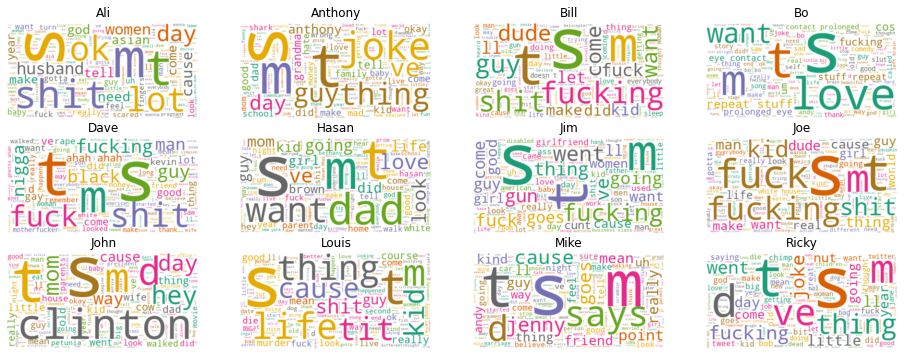

In [70]:
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = [16 , 6]        # 'rcParams' = reset dimensions (for nicer look) #



# Create subplots #

names = ["Ali" , "Anthony" , "Bill" , "Bo" , "Dave" , "Hasan" , "Jim" , "Joe" , "John" , "Louis" , "Mike" , "Ricky"]


for index , comedian in enumerate(data.columns) :
    
    wc.generate(data_clean.transcript[comedian])
    
    
    plt.subplot(3 , 4 , index + 1)
    
    plt.imshow(wc , interpolation = "bilinear")
    
    plt.axis("off")
    
    plt.title(names[index])
    
    
plt.show()


# 
Next, we'll analyse the **amount of "*bad words***" spoken by each comedian with 
## 6) Profanity in Speech.
# 

In [71]:
Counter(words).most_common()

[('like', 12),
 ('know', 12),
 ('just', 12),
 ('don', 12),
 ('right', 12),
 ('people', 12),
 ('got', 10),
 ('oh', 9),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('say', 7),
 ('didn', 7),
 ('shit', 6),
 ('cause', 6),
 ('really', 6),
 ('ve', 6),
 ('good', 6),
 ('fucking', 6),
 ('ll', 6),
 ('going', 6),
 ('day', 5),
 ('thing', 5),
 ('did', 5),
 ('want', 5),
 ('fuck', 5),
 ('guy', 4),
 ('come', 4),
 ('little', 4),
 ('women', 3),
 ('dude', 3),
 ('white', 3),
 ('dad', 3),
 ('let', 3),
 ('old', 3),
 ('hey', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('mean', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('god', 2),
 ('tell', 2),
 ('baby', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('make', 2),
 ('everybody', 2),
 ('love', 2),
 ('mom', 2),
 ('look', 2),
 ('girl', 2),
 ('goes', 2),
 ('house', 2),
 ('real', 2),
 ('kids', 2),
 ('way', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('work', 1),
 ('asian', 1),
 ('anthony', 1),
 ('grandma',

* **Create** a model to isolate bad words, [ *create a list* ]

In [81]:
data_bad_words = data.transpose()[["fucking" , "fuck" , "shit"]]

* Create an object and concatinate/join, [ we'll make 2 lists: 'f' word derivatives, and 's' word ]

In [82]:
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck , data_bad_words.shit] , axis = 1)

In [83]:
data_profanity.columns= ["f_word" , "s_word"]

In [84]:
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,64
bo,37,7
dave,65,45
hasan,24,15
jim,116,20
joe,136,40
john,4,6
louis,21,25


Now we can clearly see the amount of profanity each comedian has spoken.
# 
Next, I want to create a **2D plot**, for that we'll:

* **Create** a scatter plot, [ *with **matplotlib*** ]

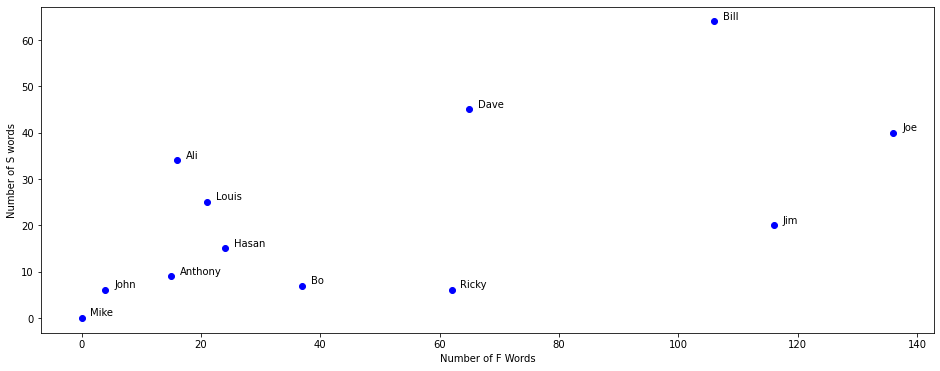

In [88]:
for i , comedian in enumerate(data_profanity.index) : 
    
    x = data_profanity.f_word.loc[comedian]
    
    y = data_profanity.s_word.loc[comedian]
    
    
    plt.scatter(x , y , color = "blue")
    
    
    plt.text(x + 1.5 , y + 0.5 , names[i] , fontsize = 10)          # we give these values to render our comedian names 'outside' their plotted dots #
    
    
plt.xlabel("Number of 'F' Words")

plt.ylabel("Number of 'S' Words")


plt.show()


# 
## 7) Sentimental Analysis.
So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The ***TextBlob*** module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is ***labeled*** in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is (*'-1' is very ***negative***, '+1' is very ***positive****).
   * **Subjectivity**: How subjective, or opinionated a word is (*'0' is ***fact***, '+1' is very much an ***opinion****).

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

* First, **install** (on anaconda prompt) and **call-in** 'textblob',  [ *'conda install -c conda forge textblob'* ] 

In [91]:
# Check our data #

data_clean

,transcript
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...
hasan,what’s up davis what’s up i’m home i had to ...
jim,ladies and gentlemen please welcome to the ...
joe,ladies and gentlemen welcome joe rogan wha...
john,all right petunia wish me luck out there you w...
louis,introfade the music out let’s roll hold there ...


In [92]:
from textblob import TextBlob

* **Create** and **compare** the polarities, [ using *'lambda'*]

In [93]:
pol = lambda x : TextBlob(x).sentiment.polarity

sub = lambda x : TextBlob(x).sentiment.subjectivity


* **Define** the polarity and subjectivity, [ while also ***adding*** these 2 as new columns in our *'data_clean'* ]

In [96]:
data_clean["polarity"] = data_clean["transcript"].apply(pol)         # Calling-in the polarity for every single transcript #

data_clean["subjectivity"] = data_clean["transcript"].apply(sub)     # Subjectivity #

In [97]:
# Check data again #

data_clean

,transcript,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,0.066938,0.482403
anthony,thank you thank you thank you san francisco th...,0.055427,0.558317
bill,all right thank you thank you very much thank...,0.017374,0.536474
bo,bo what old macdonald had a farm e i e i o and...,0.080360,0.554117
dave,this is dave he tells dirty jokes for a living...,-0.003429,0.513205
hasan,what’s up davis what’s up i’m home i had to ...,0.091424,0.454956
jim,ladies and gentlemen please welcome to the ...,0.048750,0.529328
joe,ladies and gentlemen welcome joe rogan wha...,0.010167,0.551108
john,all right petunia wish me luck out there you w...,0.080127,0.485547
louis,introfade the music out let’s roll hold there ...,0.058992,0.516348


Now we can analyze that all of these comedians are ***opinionated***, not so much ***'fact-based'***.
# 
We'll continue by **plotting** the Polarity and Subjectivity [ using ***scatter plot*** ].
 
* **Import** *'matplotlib'* and **create** '*for*' loop,

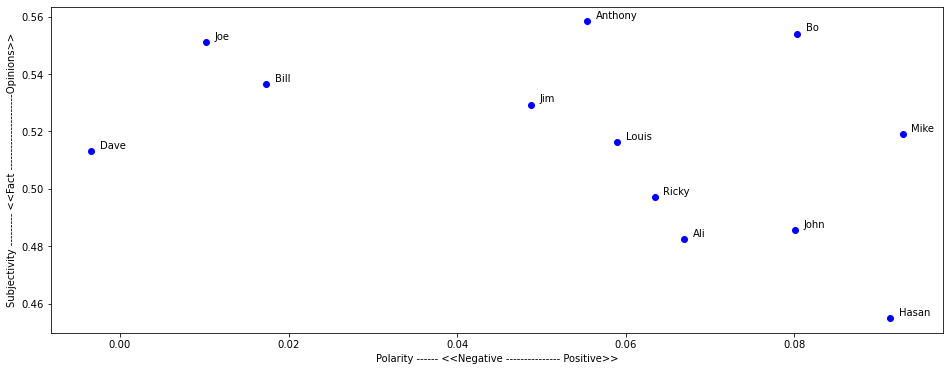

In [106]:
import matplotlib.pyplot as plt


names = ["Ali" , "Anthony" , "Bill" , "Bo" , 
         
         "Dave" , "Hasan" , "Jim" , "Joe" , "John" , "Louis" , "Mike" , "Ricky"]


for index , comedian in enumerate(data_clean.index) :
    
    x = data_clean.polarity.loc[comedian]                         # To extract polarity from each of the comedians #
    
    y = data_clean.subjectivity.loc[comedian]                     # Subjectivity extraction #
    
    
    plt.scatter(x , y , color = "blue")
    
    plt.text(x + .001 , y + .001 , names[index], fontsize = 10 )
    
    
plt.xlabel("Polarity ------ <<Negative --------------- Positive>>")

plt.ylabel("Subjectivity --------- <<Fact ---------------------Opinions>>")


plt.show()


# 
## 8) Topic Modeling.

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to ***find various topics*** that are ***present*** in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for *text data*.

To use a topic modeling technique, you need to provide **(1)** a document-term matrix and **(2)** the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to ***interpret the results*** and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.
# 
### ° Topic Modeling - Attempt #1 (All Text):

> **Import** new libraries, [ ***install** on Anaconda Prompt first* ]

In [144]:
from gensim import matutils , models

import scipy.sparse


print(data_stop.head())

         aaaaah  aaaaahhhhhhh  aaaaauuugghhhhhh  aaaahhhhh  aaah  aah  abc  \
ali           0             0                 0          0     0    0    1   
anthony       0             0                 0          0     0    0    0   
bill          1             0                 0          0     0    0    0   
bo            0             1                 1          1     0    0    0   
dave          0             0                 0          0     1    0    0   

         abcs  ability  abject  ...  zee  zen  zeppelin  zero  zillion  \
ali         0        0       0  ...    0    0         0     0        0   
anthony     0        0       0  ...    0    0         0     0        0   
bill        1        0       0  ...    0    0         0     1        1   
bo          0        1       0  ...    0    0         0     1        0   
dave        0        0       0  ...    0    0         0     0        0   

         zombie  zombies  zoning  zoo  éclair  
ali           1        0       0    0 

This is how a **document-term matrix** looks like.

> **Transpose** (row into column, column into row), [ *will become* ***term-document matrix*** ]

In [145]:
tdm = data_stop.transpose()     # dtm --> tdm #

tdm.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


This is how a **term-document matrix** looks like.

> We'll **add** the 'tdm' into a new ***gensim*** format, [ *from 'df' --> 'sparse matrix' --> 'gensim corpus'* ]

In [148]:
sparse_counts = scipy.sparse.csr_matrix(tdm)                # Converts 'tdm' --> sparse matrix ; 

# print(sparse_counts)


corpus = matutils.Sparse2Corpus(sparse_counts)              # 'Gensim Corpus' #


# 
Gensim requires a *{dictionary}* of all the terms, and their respective *ocation* in the **tdm**. For this we'll

> **Create** your tdm dictionary,

In [152]:
cv = CountVectorizer(stop_words = stop_words)

id2word = dict((v , k) for k , v in cv.vocabulary_.items())


print(id2word)

{3608: 'ladies', 2702: 'gentlemen', 7130: 'welcome', 6167: 'stage', 156: 'ali', 7224: 'wong', 3042: 'hi', 3023: 'hello', 6553: 'thank', 1328: 'coming', 5813: 'shit', 1021: 'cause', 4713: 'pee', 4127: 'minutes', 2231: 'everybody', 6854: 'um', 2251: 'exciting', 1675: 'day', 7287: 'year', 6804: 'turned', 7296: 'yes', 276: 'appreciate', 6850: 'uh', 6510: 'tell', 2717: 'getting', 4484: 'older', 2733: 'girl', 405: 'automatic', 6579: 'thought', 2617: 'fuck', 6269: 'straight', 3424: 'jealous', 2549: 'foremost', 4073: 'metabolism', 2736: 'girls', 2064: 'eat', 5922: 'sixpack', 6555: 'thatthat', 540: 'beautiful', 3303: 'inner', 6568: 'thigh', 1221: 'clearance', 2384: 'feet', 3170: 'huge', 2660: 'gap', 3741: 'light', 4944: 'potential', 5170: 'radiating', 6596: 'throughand', 5956: 'sleep', 3316: 'insomnia', 194: 'ambien', 1955: 'download', 4029: 'meditation', 4441: 'oasis', 4872: 'podcast', 928: 'calm', 1097: 'chatter', 5302: 'regret', 5370: 'resentment', 2336: 'family', 1270: 'cluttering', 4109: '

AttributeError: 'CountVectorizer' object has no attribute 'vocabulary_'

Now that we have the **corpus** (term-document matrix) and **id2word** (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. 

> Let's **start** the number of topics at *2*, see if the results make sense, and increase the number from there.

In [165]:
lda = models.LdaModel(corpus = corpus , id2word = id2word , num_topics = 2 , passes = 10)  # Implementing Topic Modeling with LDA #

lda.print_topics()

[(0,
  '0.008*"fucking" + 0.007*"shit" + 0.006*"fuck" + 0.005*"ll" + 0.005*"little" + 0.005*"ve" + 0.005*"thing" + 0.005*"cause" + 0.004*"life" + 0.004*"man"'),
 (1,
  '0.007*"ve" + 0.006*"fucking" + 0.006*"going" + 0.005*"good" + 0.005*"want" + 0.005*"ll" + 0.005*"went" + 0.005*"fuck" + 0.005*"goes" + 0.005*"day"')]

We didn't get a satisfactory 'topic separation' (so we'll try for a higher # of topics).

> **LDA** for *'num_topics = 3'*, [ ***topic** = words with similar meaning* ]

In [166]:
lda = models.LdaModel(corpus = corpus , id2word = id2word , num_topics = 3 , passes 10)

lda.print_topics()

[(0,
  '0.007*"going" + 0.007*"ve" + 0.006*"want" + 0.006*"goes" + 0.006*"ll" + 0.006*"went" + 0.005*"dad" + 0.005*"fucking" + 0.005*"really" + 0.005*"says"'),
 (1,
  '0.012*"fucking" + 0.012*"shit" + 0.010*"fuck" + 0.006*"man" + 0.005*"dude" + 0.005*"want" + 0.004*"ll" + 0.004*"cause" + 0.004*"guy" + 0.004*"make"'),
 (2,
  '0.007*"ve" + 0.006*"little" + 0.006*"thing" + 0.005*"day" + 0.005*"ll" + 0.005*"fucking" + 0.005*"good" + 0.004*"life" + 0.004*"joke" + 0.004*"went"')]

In [167]:
lda = models.LdaModel(corpus = corpus , id2word = id2word , num_topics = 4 , passes 10)

lda.print_topics()

[(0,
  '0.006*"day" + 0.006*"ve" + 0.005*"joke" + 0.005*"little" + 0.005*"dad" + 0.005*"clinton" + 0.005*"mom" + 0.004*"thing" + 0.004*"did" + 0.004*"cause"'),
 (1,
  '0.009*"shit" + 0.006*"fucking" + 0.006*"cause" + 0.006*"ll" + 0.005*"fuck" + 0.005*"guy" + 0.005*"want" + 0.005*"really" + 0.005*"thing" + 0.004*"life"'),
 (2,
  '0.011*"fucking" + 0.009*"ve" + 0.008*"fuck" + 0.007*"going" + 0.006*"went" + 0.006*"want" + 0.006*"ll" + 0.005*"love" + 0.005*"day" + 0.005*"man"'),
 (3,
  '0.000*"fucking" + 0.000*"ve" + 0.000*"shit" + 0.000*"life" + 0.000*"fuck" + 0.000*"going" + 0.000*"really" + 0.000*"want" + 0.000*"love" + 0.000*"man"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well in our 2nd Attempt.

One popular trick is to look only at terms that are from one ***part of speech*** (only *nouns*, only *adjectives*, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.
# 
### ° Topic Modeling - Attempt #2 (Nouns Only):

> **Create** a function to pull out nouns from a string of text, [ *by ***tokenizing*** (splitting whole sentences into word-sentence category, ex. verb, noun, etc.)* ]

In [168]:
from nltk import word_tokenize , pos_tag               # 'pos' = part of speech #


def nouns(text) :
    
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    
    is_noun = lambda pos : [ : 2] == 'NN'
    
    tokenized = word_tokenize(text)
    
    all_nouns = [word for (word , pos) in pos_tag(tokenized) if is_noun(pos)]
    
    return ' '.join(all_nouns)


In [169]:
data_clean

,transcript,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,0.066938,0.482403
anthony,thank you thank you thank you san francisco th...,0.055427,0.558317
bill,all right thank you thank you very much thank...,0.017374,0.536474
bo,bo what old macdonald had a farm e i e i o and...,0.080360,0.554117
dave,this is dave he tells dirty jokes for a living...,-0.003429,0.513205
hasan,what’s up davis what’s up i’m home i had to ...,0.091424,0.454956
jim,ladies and gentlemen please welcome to the ...,0.048750,0.529328
joe,ladies and gentlemen welcome joe rogan wha...,0.010167,0.551108
john,all right petunia wish me luck out there you w...,0.080127,0.485547
louis,introfade the music out let’s roll hold there ...,0.058992,0.516348


> **Apply** the *nouns* function to the transcripts to ***filter*** only on nouns,

In [170]:
import nltk 


nltk.download('averaged_perceptron_tagger')

nltk.download('punkt')


data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))

data_nouns

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,transcript
ali,ladies gentlemen stage ali hi thank hello na s...
anthony,thank thank people i ’ em i francisco city wor...
bill,thank s thank pleasure georgia area oasis t i ...
bo,macdonald farm e i o farm pig e i i snort macd...
dave,jokes living stare work profound train thought...
hasan,’ ’ m home i netflix “ la york ” i “ son davis...
jim,ladies gentlemen stage mr jim jefferies thank ...
joe,ladies gentlemen joe fuck thanks phone fuckfac...
john,petunia august hello hello chicago thank crowd...
louis,music let ’ roll hold lights lights thank i t ...


Most nouns were extracted and kept in our transcript.
# 
> **1. Create** a new *document-term matrix* using only nouns,

In [171]:
from sklearn.feature_extraction import text

from sklearn.feature_extraction.text import CountVectorizer



# Re-add the *additional stop words* since we are recreating the document-term matrix #

add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


# Recreate a document-term matrix with *only nouns* # 

cvn = CountVectorizer(stop_words = stop_words)

data_cvn = cvn.fit_transform(data_nouns.transcript)

data_dtmn = pd.DataFrame(data_cvn.toarray() , columns = cvn.get_feature_names())

data_dtmn.index = data_nouns.index

data_dtmn


,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abortion,abortions,...,ze,zealand,zee,zen,zeppelin,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,2,0,...,0,10,0,0,0,0,0,0,0,0
bill,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,1,0,0
bo,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> **2. Create** the gensim corpus (and ***3. vocabulary dictionary***),

In [162]:
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))          # dtm --> tdm #


id2wordn = dict((v , k) for k , v in cvn.vocabulary_.items())

> **Start** with *2* topics,

In [172]:
ldan = models.LdaModel(corpus = corpusn , num_topics = 2 , id2word = id2wordn , passes = 10)

ldan.print_topics()

[(0,
  '0.007*"dad" + 0.006*"shit" + 0.006*"man" + 0.006*"night" + 0.006*"way" + 0.005*"don" + 0.005*"guy" + 0.005*"cause" + 0.005*"life" + 0.005*"fuck"'),
 (1,
  '0.011*"thing" + 0.011*"day" + 0.009*"gon" + 0.008*"cause" + 0.008*"life" + 0.008*"man" + 0.007*"shit" + 0.007*"guy" + 0.007*"fuck" + 0.007*"way"')]

> **3-4** topics,

In [184]:
ldan = models.LdaModel(corpus = corpusn , num_topics = 3 , id2word = id2wordn , passes = 10)

ldan.print_topics()

[(0,
  '0.011*"shit" + 0.011*"man" + 0.010*"fuck" + 0.010*"gon" + 0.008*"guy" + 0.008*"cause" + 0.007*"way" + 0.007*"thing" + 0.006*"dude" + 0.006*"life"'),
 (1,
  '0.012*"life" + 0.011*"dad" + 0.009*"thing" + 0.008*"day" + 0.007*"don" + 0.007*"school" + 0.006*"mom" + 0.006*"way" + 0.006*"cause" + 0.006*"ve"'),
 (2,
  '0.011*"day" + 0.009*"thing" + 0.008*"cause" + 0.007*"ve" + 0.006*"man" + 0.006*"women" + 0.006*"gon" + 0.006*"way" + 0.006*"guy" + 0.006*"don"')]

In [185]:
ldan = models.LdaModel(corpus = corpusn , num_topics = 4 , id2word = id2wordn , passes = 10)

ldan.print_topics()

[(0,
  '0.010*"clinton" + 0.009*"mom" + 0.008*"dad" + 0.007*"way" + 0.007*"day" + 0.007*"hey" + 0.007*"cause" + 0.006*"cow" + 0.006*"wife" + 0.006*"house"'),
 (1,
  '0.009*"fuck" + 0.009*"man" + 0.009*"thing" + 0.008*"gon" + 0.007*"things" + 0.007*"day" + 0.007*"ve" + 0.007*"life" + 0.007*"world" + 0.006*"house"'),
 (2,
  '0.012*"shit" + 0.009*"dad" + 0.009*"gon" + 0.008*"life" + 0.008*"don" + 0.007*"day" + 0.007*"dude" + 0.007*"man" + 0.007*"kid" + 0.006*"fuck"'),
 (3,
  '0.011*"thing" + 0.010*"day" + 0.009*"cause" + 0.009*"guy" + 0.008*"life" + 0.008*"man" + 0.007*"way" + 0.007*"women" + 0.007*"lot" + 0.006*"gon"')]

With this data we can do one of the most important analysis for NLP Modeling.
# 
## 9) Text Generation.
**Markov chains** can be used for very ***basic text generation***. Think about every word in a corpus as a *state*. We can make a *simple assumption* that the next word is only ***dependent*** on the ***previous*** word - which is the basic assumption of a Markov chain.

Markov chains don't generate text ***as well as*** deep learning, but it's a good (and fun!) start.
# 
### ° Select Text to Imitate:
In this notebook, we're specifically going to generate text in the style of *'Ali Wong'*, so as a first step, let's 

> **Extract** the text from her comedy routine,

In [186]:
data_clean

,transcript,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,0.066938,0.482403
anthony,thank you thank you thank you san francisco th...,0.055427,0.558317
bill,all right thank you thank you very much thank...,0.017374,0.536474
bo,bo what old macdonald had a farm e i e i o and...,0.080360,0.554117
dave,this is dave he tells dirty jokes for a living...,-0.003429,0.513205
hasan,what’s up davis what’s up i’m home i had to ...,0.091424,0.454956
jim,ladies and gentlemen please welcome to the ...,0.048750,0.529328
joe,ladies and gentlemen welcome joe rogan wha...,0.010167,0.551108
john,all right petunia wish me luck out there you w...,0.080127,0.485547
louis,introfade the music out let’s roll hold there ...,0.058992,0.516348


In [189]:
ali_text = data_clean.transcript.loc['ali']

ali_text[ : ]

'ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with ’cause i have to pee in like ten minutes but thank you everybody so much for coming um… it’s a very exciting day for me it’s been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that i’m getting older because now when i see an  girl my automatic thought… is “fuck you” “fuck you i don’t even know you but fuck you” ‘cause i’m straight up jealous i’m jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep right they don’t have insomnia yet they don’t know what it’s like 

# 
### ° Build Markov Chain Function:
We are going to build a simple Markov chain function that creates a dictionary:
* The ***keys*** should be *all of the words in the corpus*,
* The ***values*** should be a *list* of the words that follow the keys,

In [190]:
from collections import defaultdict


def markov_chain(text):
    
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    
    # Tokenize the text by *word*, though including punctuation #
    
    words = text.split(' ')
    
    
    # Initialize a default *dictionary* to hold all of the words and next words #
    
    m_dict = defaultdict(list)
    
    
    # Create a *zipped list* of all of the word pairs and put them in 'word = list of next words' format #
    
    for current_word, next_word in zip(words[0:-1], words[1:]):
        
        m_dict[current_word].append(next_word)

        
    # Convert the *default dict* back into a dictionary #
    
    m_dict = dict(m_dict)
    
    return m_dict


> **Create** the dictionary for *Ali's* routine, take a look,

In [191]:
ali_dict = markov_chain(ali_text)

ali_dict

{'ladies': ['and', 'go', 'who', 'they', 'and', 'who'],
 'and': ['gentlemen',
  'foremost',
  'then',
  'have',
  'there’s',
  'resentment',
  'get',
  'get',
  'says',
  'my',
  'she',
  'snatch',
  'running',
  'fighting',
  'yelling',
  'it',
  'everybody',
  'my',
  'she',
  'i',
  'uh',
  'i',
  'i',
  'the',
  'i',
  'i',
  'i',
  'we',
  'we–',
  'then',
  'i',
  'watched',
  'i',
  'have',
  'that',
  'you',
  'recycling',
  'disturbing',
  'it’s',
  'all',
  'just…',
  'then',
  'be',
  'halfvietnamese',
  'we',
  'his',
  'i',
  'slide',
  'your',
  'inflamed',
  'you’re',
  'then',
  'i',
  'halfjapanese',
  'i’m',
  'halfvietnamese',
  'playing',
  'rugby',
  'on',
  'foremost',
  'a',
  'the',
  'emotionally',
  'i',
  '',
  'so',
  'neither',
  'i',
  'i–',
  'then',
  'it’s',
  'find',
  'start',
  'just',
  'caves',
  'gets',
  'is',
  'then',
  'look',
  'like',
  'very',
  'for',
  'i',
  'she',
  'rise',
  'her',
  'be',
  'eat',
  'watch',
  'then',
  'be',
  'now',


# 
### ° Create a Text Generator:

We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary you just created
* The number of words you want generated

Here are some examples of generated sentences:

>'Shape right turn– I also takes so that she’s got women all know that snail-trail.'

>'Optimum level of early retirement, and be sure all the following Tuesday… because it’s too.'

In [192]:
import random


def generate_sentence(chain, count=15):
    
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    
    # Capitalize the first word #
    
    word1 = random.choice(list(chain.keys()))
    
    sentence = word1.capitalize()

    
    # Generate the second word from the value list. Set the new word as the first word. Repeat. #
    
    for i in range(count-1):
        
        word2 = random.choice(chain[word1])
        
        word1 = word2
        
        sentence += ' ' + word2

        
    # End it with a period #
    
    sentence += '.'
    
    return(sentence)import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

# 
> **Generate New Text** (*in the style of*):

In [197]:
generate_sentence(ali_dict)

'Forever no really i don’t gotta try to eat like when she said ‘i do’.'

#
> **Keep running** the previous line of code to get a ***different quote each time!***